In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
weight_file = "good_weights/good_weights"
loaded_params = load_weights(weight_file+"4.pkl")


VirtualRat0
pro_only
Episode 200 complete (0.01s), loss: 43.4261486317, reward: 3, running reward: 0.775016804524
Episode 400 complete (0.01s), loss: 17.3074565451, reward: 3, running reward: 1.0612294111
Episode 600 complete (0.01s), loss: 13.3950652355, reward: 3, running reward: 2.01731017406
Episode 800 complete (0.01s), loss: 12.4778931894, reward: 5, running reward: 2.89418411873
Episode 1000 complete (0.01s), loss: 29.232384113, reward: 1, running reward: 3.44223952428
alternative
Episode 200 complete (0.02s), loss: -6.26369314996, reward: -1, running reward: 0.197612483958
Episode 400 complete (0.01s), loss: 23.1264425166, reward: 3, running reward: 0.600439720611
Episode 600 complete (0.01s), loss: 12.6279485222, reward: 1, running reward: 1.91441965402
Episode 800 complete (0.02s), loss: -5.34854256806, reward: -1, running reward: 1.93275326414
Episode 1000 complete (0.01s), loss: 31.233599222, reward: 3, running reward: 2.85287947028
Episode 1200 complete (0.01s), loss: 14.

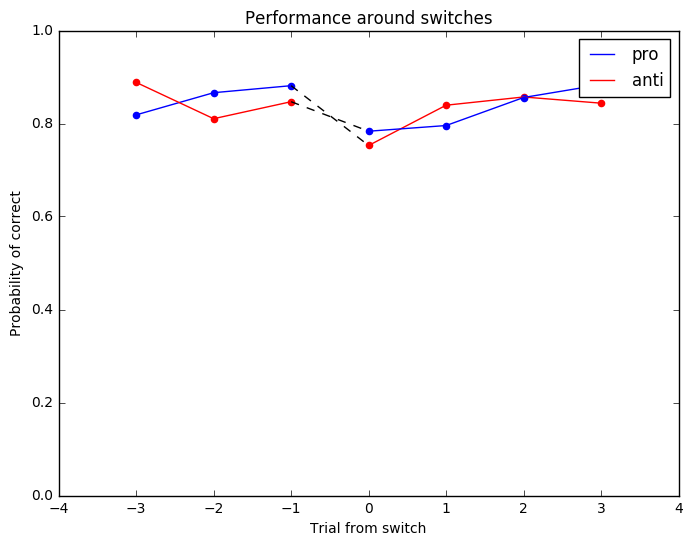

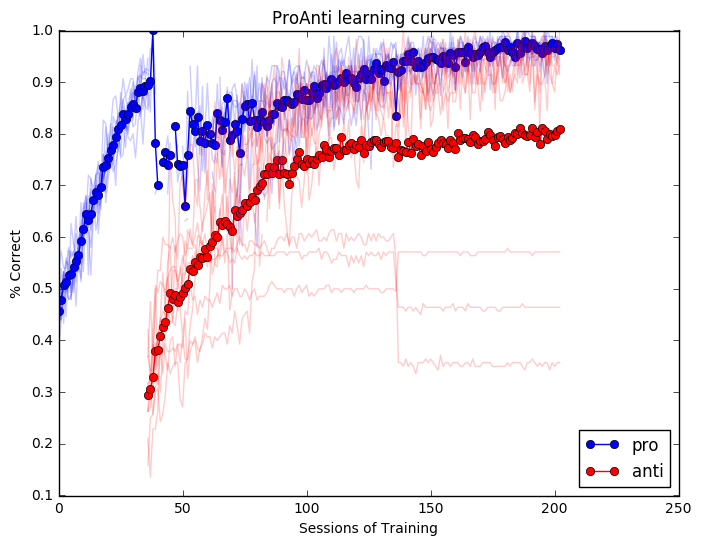

In [29]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(10):
    print 
    ratname = 'VirtualRat'+str(i)
    print ratname
    model = SimplePolicyNetwork(hidden_dim=5,reg=0, noise_factor = 0.5)
    rat = SimRat(model)
    print "pro_only"
    box = simpleBox(mode="pro_only",length=150,block_size=30,random_range=0,
                    trial_per_episode=5, repeat = False, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.003,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=1101,
                                        verbose=False,
                                        supervised = False,
                                        print_every=200)
    solver.load_params(loaded_params)
    solver.train()

    #box.change_mode("anti_only")
    #solver.change_settings(learning_rate=0.2,num_episodes=501)
    #solver.train()
    
    print "alternative"
    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.05,num_episodes=3001)
    solver.train()
    
    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=2001)
    solver.train()
    
    probs = rat.predict(val_X,val_y)
    
    rats[ratname] = rat
    rat.addHistory(box.output_history())
    rat.computeLearningCurve()
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)
pro_mean, anti_mean = meanLearningCurve(rats)
learningCurve(pro_mean,anti_mean, rats)


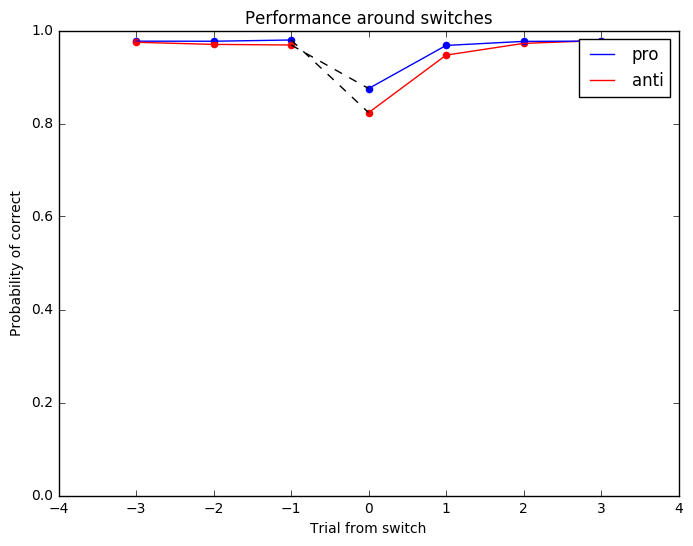

dataProcessFunctions.py:415: RuntimeWarning: Mean of empty slice
  pro_mean = np.nanmean(pro_matrix, axis = 0)
dataProcessFunctions.py:416: RuntimeWarning: Mean of empty slice
  anti_mean = np.nanmean(anti_matrix, axis = 0)


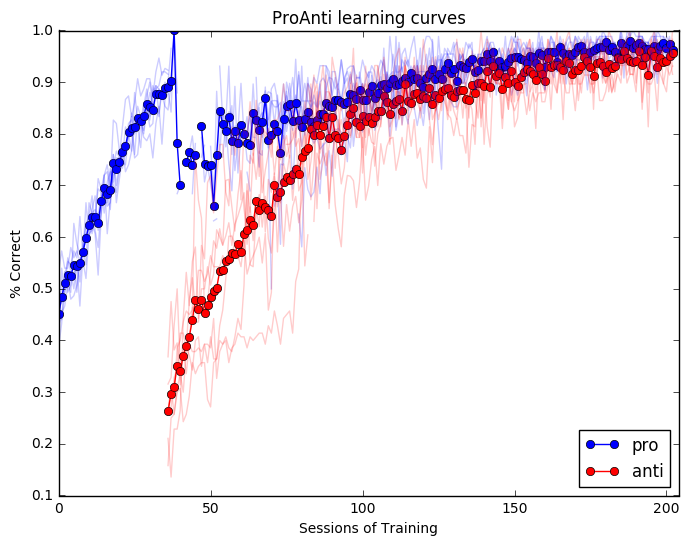

In [35]:
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)
pro_mean, anti_mean = meanLearningCurve(rats)
learningCurve(pro_mean,anti_mean, rats)